In [ ]:
import numpy as np

# A. Create a random integer 'N' between 20 and 101
N = np.random.randint(20, 102)

In [ ]:
# B. Create a list of random floats sampled from the normal distribution N(0, 1)
floats_list = np.random.normal(0, 1, N)

In [ ]:
# C. Create a numpy array from the list
array = np.array(floats_list)

In [ ]:
# D. Compute the mean and standard deviation using numpy
mean_value = np.mean(array)
std_deviation = np.std(array)

In [ ]:
# E. Comment with the mean and standard deviation values
print(f"My array has the mean value equal to {mean_value} and its standard deviation is equal to {std_deviation}.")

My array has the mean value equal to -0.12250828519585669 and its standard deviation is equal to 0.889009907399395.


In [ ]:
import numpy as np

slownik = {
    'key1': list(np.random.rand(6)),
    'key2': list(np.random.rand(6)),
    'key3': list(np.random.rand(6)),
    'key4': list(np.random.rand(6)),
    'key5': list(np.random.rand(6)),
}


In [ ]:
import pandas as pd

df = pd.DataFrame(slownik)

In [ ]:
print(slownik)

{'key1': [0.3277353899213845, 0.9861690023126038, 0.12227258384648887, 0.7563883196075294, 0.6190580596600325, 0.35596610153493236], 'key2': [0.6737522220820754, 0.41831611390397694, 0.7062309539718397, 0.7365449031887061, 0.7535888012324562, 0.4101979183434017], 'key3': [0.1935533752127382, 0.24194563875824004, 0.8514286159052858, 0.7145558817764202, 0.38973482033041396, 0.9799907713094482], 'key4': [0.0031937885281567713, 0.6500883879830255, 0.5388919160220118, 0.7718365274022678, 0.8546600809205274, 0.06657544315886377], 'key5': [0.408359667888035, 0.1544044344776625, 0.6867220049386591, 0.34440195567750087, 0.07556886217604453, 0.553285638065943]}


In [ ]:
print(df.describe())

           key1      key2      key3      key4      key5
count  6.000000  6.000000  6.000000  6.000000  6.000000
mean   0.527932  0.616438  0.561868  0.480874  0.370457
std    0.317707  0.158979  0.331548  0.362270  0.232036
min    0.122273  0.410198  0.193553  0.003194  0.075569
25%    0.334793  0.482175  0.278893  0.184655  0.201904
50%    0.487512  0.689992  0.552145  0.594490  0.376381
75%    0.722056  0.728966  0.817210  0.741399  0.517054
max    0.986169  0.753589  0.979991  0.854660  0.686722


In [ ]:
#A. Change your 'slownik' so that two values contain categorical (string) data instead of the floats.
slownik['key1'] = ['cat', 'dog', 'bird', 'dog', 'cat', 'bird']
slownik['key2'] = ['red', 'blue', 'green', 'blue', 'red', 'green']

In [ ]:
#B. Replace floats or strings with np.nan in at least four places in the values in 'slownik'.
slownik['key3'][2] = np.nan
slownik['key4'][3] = np.nan
slownik['key1'][1] = np.nan
slownik['key2'][0] = np.nan

In [ ]:
#C. Perform imputation of the missing data. Use 'median' as an imputation methods for the columns
#containing floating-point numbers and 'constant' method for the columns with
#categorical data.
from sklearn.impute import SimpleImputer

# Create DataFrame from the dictionary
df = pd.DataFrame(slownik)

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='median')
df[['key3', 'key4', 'key5']] = imputer.fit_transform(df[['key3', 'key4', 'key5']])

# Impute missing values in categorical columns
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df[['key1', 'key2']] = imputer.fit_transform(df[['key1', 'key2']])

print(df)

      key1     key2      key3      key4      key5
0      cat  missing  0.193553  0.003194  0.408360
1  missing     blue  0.241946  0.650088  0.154404
2     bird    green  0.389735  0.538892  0.686722
3      dog     blue  0.714556  0.538892  0.344402
4      cat      red  0.389735  0.854660  0.075569
5     bird    green  0.979991  0.066575  0.553286


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform 'key1' and 'key2' columns
encoded_values = encoder.fit_transform(df[['key1', 'key2']]).toarray()

# Extract column names after OneHotEncoding
encoded_columns = encoder.get_feature_names_out(['key1', 'key2'])

# Create DataFrame from encoded values and columns
df_encoded = pd.DataFrame(encoded_values, columns=encoded_columns)

# Drop 'key1' and 'key2' from original DataFrame
df = df.drop(['key1', 'key2'], axis=1)

# Concatenate original DataFrame with encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)

print(df)

       key3      key4      key5  key1_bird  key1_cat  key1_dog  key1_missing  \
0  0.193553  0.003194  0.408360        0.0       1.0       0.0           0.0   
1  0.241946  0.650088  0.154404        0.0       0.0       0.0           1.0   
2  0.389735  0.538892  0.686722        1.0       0.0       0.0           0.0   
3  0.714556  0.538892  0.344402        0.0       0.0       1.0           0.0   
4  0.389735  0.854660  0.075569        0.0       1.0       0.0           0.0   
5  0.979991  0.066575  0.553286        1.0       0.0       0.0           0.0   

   key2_blue  key2_green  key2_missing  key2_red  
0        0.0         0.0           1.0       0.0  
1        1.0         0.0           0.0       0.0  
2        0.0         1.0           0.0       0.0  
3        1.0         0.0           0.0       0.0  
4        0.0         0.0           0.0       1.0  
5        0.0         1.0           0.0       0.0  


In [ ]:
#Problem 4.
#A. Select a random integer N between 100 and 200 using numpy.
import numpy as np

N = np.random.randint(100, 201)

In [ ]:
#B. Use make_classification function to create a classification problem with n_samples = N.
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=N, n_features=20, random_state=42)

In [ ]:
#C. Divide the data returned by make_classification into the training and test parts.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#D. Perform the classification using RandomForestClassifier.
from sklearn.ensemble import RandomForestClassifier

# Initialize a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the test data
y_pred = clf.predict(X_test)

In [ ]:
#show the classification
from sklearn.metrics import confusion_matrix, classification_report

# 计算混淆矩阵 confusion_matrix :)
print("混淆矩阵:confusion matrix")
print(confusion_matrix(y_test, y_pred))

# 显示分类报告 classification_report :)
print("分类报告:classification report")
print(classification_report(y_test, y_pred))

混淆矩阵:confusion matrix
[[23  3]
 [ 1 13]]
分类报告:classification report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.81      0.93      0.87        14

    accuracy                           0.90        40
   macro avg       0.89      0.91      0.89        40
weighted avg       0.91      0.90      0.90        40



In [ ]:
#A. Using numpy, create the data:
#x = numpy.linspace(1, 10, 20)
#x1 = x.reshape((-1, 1))
#y = 2*x + np.sin(200*numpy.pi*x)
import numpy as np

x = np.linspace(1, 10, 20)
x1 = x.reshape((-1, 1))
y = 2*x + np.sin(200*np.pi*x)


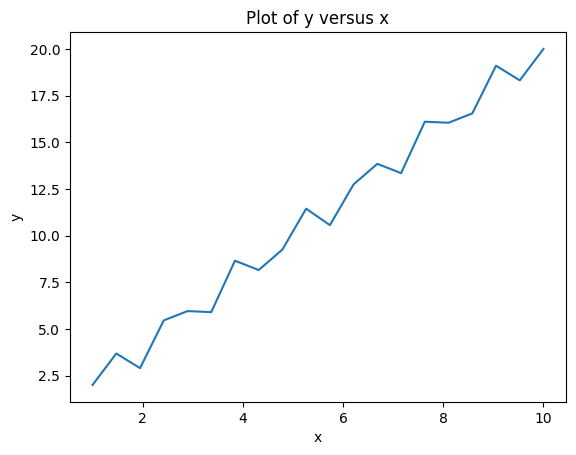

In [ ]:
#B. Using matplotlib.pyplot create a plot of y versus x.
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y versus x')
plt.show()

In [ ]:
#C. Formulate a sentence to reply to the question: what does the method reshape((-1, 1)) does to x?
print("Shape of x:", x.shape)
print("First five values of x:", x[:5])
print("Shape of x1:", x1.shape)
print("First five values of x1:", x1[:5])

# The reshape((-1, 1)) method transforms x from a 1D array into a 2D array with one column.
print("The reshape((-1, 1)) method transforms x from a 1D array into a 2D array with one column.")

Shape of x: (20,)
First five values of x: [1.         1.47368421 1.94736842 2.42105263 2.89473684]
Shape of x1: (20, 1)
First five values of x1: [[1.        ]
 [1.47368421]
 [1.94736842]
 [2.42105263]
 [2.89473684]]
The reshape((-1, 1)) method transforms x from a 1D array into a 2D array with one column.


In [ ]:
#D. Using the class LinearRegression from the module sklearn.linear_model, build and fit a model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x1, y)


LinearRegression()

In [ ]:
#E. Use the fitted model, please compute and print the coefficient \beta_0 (attribute
#'intercept_') and \beta_1 (attribute 'coef_'). Needless to say, \beta_0 should be close to zero,
#and \beta_1 should be close to 2.
print("β0 (intercept):", model.intercept_)
print("β1 (coefficient):", model.coef_[0])


β0 (intercept): 0.07275865065096454
β1 (coefficient): 1.986771154427099


In [ ]:
#Haoran Liang 58298